In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols


In [13]:
df = pd.read_csv("life_insurance.txt", sep='\s+', header=None,names=['X1','X2','Y'])

In [14]:
X1 = df['X1']
X2 = df['X2']
Y = df['Y']

In [15]:
df.head()

,X1,X2,Y
0,45.010,6,91
1,57.204,4,162
2,26.852,5,11
3,66.290,7,240
4,40.964,5,73


In [20]:
matY = np.array(Y)
print('Y= ',matY,'\n')

Y=  [ 91 162  11 240  73 311 316 154 164  54  53 326  55 130 112  91  14  63] 



In [21]:
col1 = np.array(X1)
col2 = np.array(X2)
matX = np.stack( (matJ,col1,col2),axis = 1)

In [22]:
X_X = np.dot(matX.T,matX)
print("X'X= ",X_X,'\n')

X'X=  [[1.80000000e+01 9.00662000e+02 9.70000000e+01]
 [9.00662000e+02 4.91799262e+04 5.00865400e+03]
 [9.70000000e+01 5.00865400e+03 6.13000000e+02]] 



In [23]:
X_Y = np.dot(matX.T,matY)
print("X'Y= ",X_Y, '\n')

X'Y=  [  2420.    147690.816  14444.   ] 



In [24]:
Invert = np.linalg.pinv(X_X) 

In [25]:
b=Invert.dot(X_Y)

In [26]:
b_trans = np.transpose(b)
b_trans

array([-205.71865941,    6.28802867,    4.73760202])

In [27]:
# double check the results by OLS 
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(matX,matY)
print('Intercept:\n',regr.intercept_)
print('Coeficients:\n',regr.coef_ )

Intercept:
 -205.71865940662974
Coeficients:
 [0.         6.28802867 4.73760202]


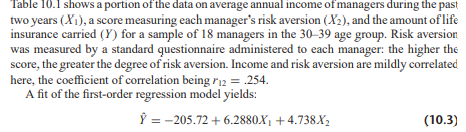


In [18]:
from numpy import *
XY = df.values
a = np.ones((len(X1), 1))
X = insert(XY[:,2:5],[0],a,1)
print(X)
allX = [X1, X2]

[[  1.  91.]
 [  1. 162.]
 [  1.  11.]
 [  1. 240.]
 [  1.  73.]
 [  1. 311.]
 [  1. 316.]
 [  1. 154.]
 [  1. 164.]
 [  1.  54.]
 [  1.  53.]
 [  1. 326.]
 [  1.  55.]
 [  1. 130.]
 [  1. 112.]
 [  1.  91.]
 [  1.  14.]
 [  1.  63.]]


In [19]:
for x in allX:
    x_bar = np.mean(x)
    Y_bar = np.mean(Y)
    x_err = x - x_bar
    Y_err = Y - Y_bar
    A = np.sum(x_err*Y_err)
    B = np.sum(x_err**2)
    b1 = A / B
    b0 = Y_bar - b1*x_bar
    n = len(x)
    Y_hat = b0 + b1*x
    resid = Y - Y_hat
    SSE = np.sum((Y - Y_hat)**2)
    MSE = SSE / (n-2)
    SSR = sum((Y_hat - Y_bar)**2)
    SSTO = SSR + SSE
    R_squared = SSR/SSTO
    print(f' R_square {R_squared}')

 R_square 0.975612054030271
 R_square 0.12363834035548296


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     542.3
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           1.03e-14
Time:                        12:05:55   Log-Likelihood:                -69.596
No. Observations:                  18   AIC:                             145.2
Df Residuals:                      15   BIC:                             147.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -205.7187     11.393    -18.057      0.0

C:\Users\tanvu\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
